In [ ]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/500000 Sales Records new.csv')

In [ ]:
data_frame=pd.DataFrame(data)
data_frame.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Customer ID
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,44605.0
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,44605.0
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,44605.0
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28,44605.0
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18,44605.0


In [ ]:
data_frame= data_frame.dropna(subset=['Customer ID'])


In [ ]:
data_frame.rename(columns={'Customer ID':'CustomerID'},inplace=True)

In [ ]:
data_frame.CustomerID=data_frame.CustomerID.astype('int64')
data_frame.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,CustomerID
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,44605
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,44605
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,44605
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28,44605
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18,44605


In [ ]:
data_frame=data_frame[data_frame['Units Sold']>0]

In [ ]:
data_frame.duplicated().any()

False

In [ ]:
print(data_frame.nunique())

Region                7
Country             185
Item Type            12
Sales Channel         2
Order Priority        4
Order Date         2766
Order ID          32419
Ship Date          2809
Units Sold         9628
Unit Price           12
Unit Cost            12
Total Revenue     28564
Total Cost        28553
Total Profit      28555
CustomerID         5453
dtype: int64


In [ ]:
filtered_data = data_frame[["Country","CustomerID"]].drop_duplicates()
print(filtered_data.head())
filtered_data.shape

            Country  CustomerID
0      South Africa       44605
1           Morocco       44605
2  Papua New Guinea       44605
3          Djibouti       44605
4          Slovakia       44605


(31932, 2)

<Axes: xlabel='Country'>

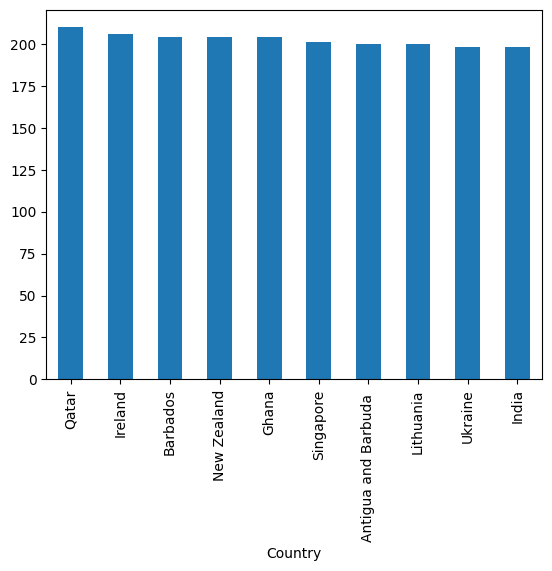

In [ ]:
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [ ]:
data_frame = data_frame[['CustomerID','Order ID','Order Date','Units Sold','Unit Price']]
data_frame['Total Price']=data_frame['Units Sold']*data_frame['Unit Price']
data_frame['Order Date']=pd.to_datetime(data_frame['Order Date'],format="%m-%d-%y ")
data_frame.head()

,CustomerID,Order ID,Order Date,Units Sold,Unit Price,Total Price
0,44605,443368995,2012-07-27,1593,9.33,14862.69
1,44605,667593514,2013-09-14,4611,109.28,503890.08
2,44605,940995585,2015-05-15,360,421.89,151880.40
3,44605,880811536,2017-05-17,562,109.28,61415.36
4,44605,174590194,2016-10-26,3973,47.45,188518.85


In [ ]:
present_time = datetime.now()
present_time

datetime.datetime(2024, 11, 18, 7, 42, 52, 407074)

In [ ]:
rfm = data_frame.groupby("CustomerID").agg({"Order Date":lambda date :(present_time - date.max()).days,
"Order ID": lambda num : len(num),
"Total Price" : lambda price : price.sum()})

rfm.head()

,Order Date,Order ID,Total Price
CustomerID,,,
7,2693,8,14547177.88
14,4057,5,3725527.78
20,3301,4,4225332.82
39,2795,7,10711313.94
47,2902,8,8698614.50


In [ ]:
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5453 entries, 7 to 50000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5453 non-null   int64  
 1   Frequency  5453 non-null   int64  
 2   Monetary   5453 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 170.4 KB


In [ ]:
rfm['R_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])

rfm['F_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])

rfm['M_quartile'] = pd.qcut(rfm['Monetary'], 4, ['4','3','2','1'])
rfm.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
7,2693,8,14547177.88,1,1,1
14,4057,5,3725527.78,4,3,4
20,3301,4,4225332.82,4,4,4
39,2795,7,10711313.94,1,2,1
47,2902,8,8698614.50,2,1,2


In [ ]:
rfm["RFM_Score"] = rfm.R_quartile.astype(str) + rfm.F_quartile.astype(str) +rfm.M_quartile.astype(str)
rfm.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score
CustomerID,,,,,,,
7,2693,8,14547177.88,1,1,1,111
14,4057,5,3725527.78,4,3,4,434
20,3301,4,4225332.82,4,4,4,444
39,2795,7,10711313.94,1,2,1,121
47,2902,8,8698614.50,2,1,2,212


In [ ]:
rfm[rfm['RFM_Score']=='111'].sort_values('Monetary',ascending=False).head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score
CustomerID,,,,,,,
18407,2772,10,10700262.72,1,1,1,111
32679,2756,8,10684552.42,1,1,1,111
19343,2683,9,10679044.80,1,1,1,111
3474,2792,8,10663686.00,1,1,1,111
46106,2770,9,10637379.39,1,1,1,111


In [ ]:

rfm["RFM_Score"] = rfm['RFM_Score'].astype(int)
segment_labels = ['High-Value', 'Mid-Value','Low-Value']
rfm['Value_Segment'] = pd.qcut(rfm['RFM_Score'], q=3, labels=segment_labels)
rfm.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score,Value_Segment
CustomerID,,,,,,,,
7,2693,8,14547177.88,1,1,1,111,High-Value
14,4057,5,3725527.78,4,3,4,434,Low-Value
20,3301,4,4225332.82,4,4,4,444,Low-Value
39,2795,7,10711313.94,1,2,1,121,High-Value
47,2902,8,8698614.50,2,1,2,212,High-Value


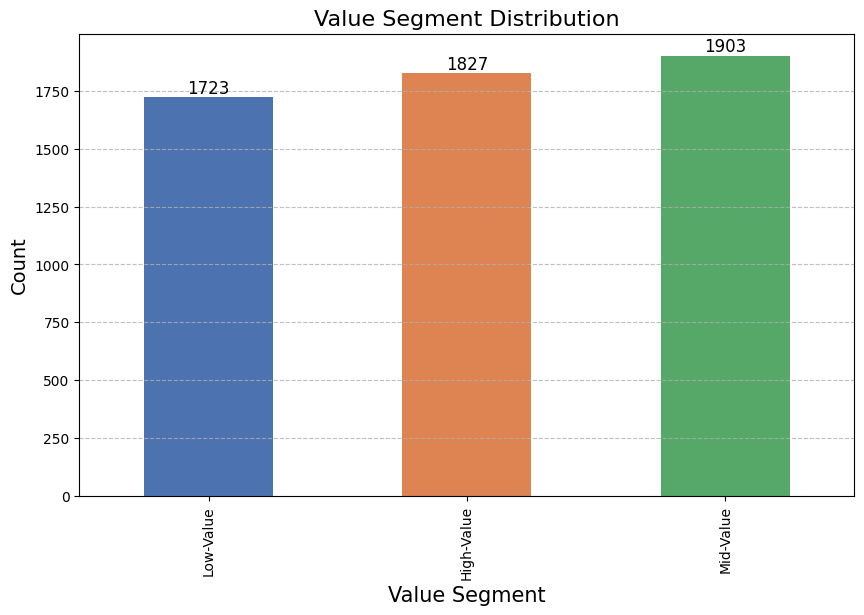

In [ ]:
plt.figure(figsize=(10, 6))
ax = rfm.Value_Segment.value_counts().sort_values().plot(kind='bar', color=sns.color_palette("dark"))

ax.set_title('Value Segment Distribution', fontsize=16)
ax.set_xlabel('Value Segment', fontsize=15)
ax.set_ylabel('Count', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.8)

for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}',
  (p.get_x() + p.get_width() / 2., p.get_height()),
  ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
# @title Default title text

segment_scores = rfm.groupby('Value_Segment')[['Recency', 'Frequency','Monetary']].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
x=segment_scores['Value_Segment'],
y=segment_scores['Recency'],
name='Recency Score',
marker_color='rgb(255,182,193)'
))
fig.add_trace(go.Bar(
x=segment_scores['Value_Segment'],
y=segment_scores['Frequency'],
name='Frequency Score',
marker_color='rgb(255,105,180)'
))

fig.add_trace(go.Bar(
x=segment_scores['Value_Segment'],
y=segment_scores['Monetary'],
name='Monetary Score',
marker_color='rgb(219,112,147)'
))
fig.update_layout(
title='Comparison of RFM Segments based on Recency, Frequency, and Monetary␣Scores',
xaxis_title='RFM Segments',
yaxis_title='Score',
barmode='group',
showlegend=True
)

fig.show()

<ipython-input-58-ded3340a684d>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

